<a href="https://colab.research.google.com/github/nhannguyenhcm95/nhannguyenhcm95/blob/main/test%20lesson%208%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Đưa Data lên

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt #Thư viện cho vẽ hình
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})

In [20]:
from google.colab import files
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore (2).csv


In [24]:
# Đọc dữ liệu từ file CSV
df_CHPLAY = pd.read_csv('googleplaystore.csv')

#Đọc Data

In [25]:
df_CHPLAY.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
unique_categories = df_CHPLAY['App'].unique()
print(unique_categories)

['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']


In [26]:
unique_categories = df_CHPLAY['Category'].unique()
print(unique_categories)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [27]:
unique_categories = df_CHPLAY['Rating'].unique()
print(unique_categories)

[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]


In [28]:
unique_categories = df_CHPLAY['Reviews'].unique()
print(unique_categories)

['159' '967' '87510' ... '603' '1195' '398307']


In [29]:
unique_categories = df_CHPLAY['Size'].unique()
print(unique_categories)

['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M'
 '201k' '3.6M' '5.7M' '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M'
 '3.9M' '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M'
 '9.0M' '6.7M' '30M' '2.6M' '7.1M' '3.7M' '22M' '7.4M' '6.4M' '3.2M'
 '8.2M' '9.9M' '4.9M' '9.5M' '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M'
 '4.0M' '2.3M' '7.2M' '2.1M' '42M' '7.3M' '9.1M' '55M' '23k' '6.5M' '1.5M'
 '7.5M' '51M' '41M' '48M' '8.5M' '46M' '8.3M' '4.3M' '4.7M' '3.3M' '40M'
 '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M' '79k' '8.4M' '118k' '44M' '695k'
 '1.6M' '6.2M' '18k' '53M' '1.4M' '3.0M' '5.8M' '3.8M' '9.6M' '45M' '63M'
 '49M' '77M' '4.4M' '4.8M' '70M' '6.9M' '9.3M' '10.0M' '8.1M' '36M' '84M'
 '97M' '2.0M' '1.9M' '1.8M' '5.3M' '47M' '556k' '526k' '76M' '7.6M'

In [30]:
unique_categories = df_CHPLAY['Type'].unique()
print(unique_categories)

['Free' 'Paid' nan '0']


In [31]:
unique_categories = df_CHPLAY['Price'].unique()
print(unique_categories)

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' 'Everyone'
 '$1.20' '$1.04']


In [32]:
unique_categories = df_CHPLAY['Content Rating'].unique()
print(unique_categories)

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'
 nan]


In [33]:
unique_categories = df_CHPLAY['Genres'].unique()
print(unique_categories)

['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle

In [34]:
unique_categories = df_CHPLAY['Last Updated'].unique()
print(unique_categories)

['January 7, 2018' 'January 15, 2018' 'August 1, 2018' ...
 'January 20, 2014' 'February 16, 2014' 'March 23, 2014']


In [35]:
unique_categories = df_CHPLAY['Current Ver'].unique()
print(unique_categories)

['1.0.0' '2.0.0' '1.2.4' ... '1.0.612928' '0.3.4' '2.0.148.0']


In [37]:
unique_categories = df_CHPLAY['Android Ver'].unique()
print(unique_categories)

['4.0.3 and up' '4.2 and up' '4.4 and up' '2.3 and up' '3.0 and up'
 '4.1 and up' '4.0 and up' '2.3.3 and up' 'Varies with device'
 '2.2 and up' '5.0 and up' '6.0 and up' '1.6 and up' '1.5 and up'
 '2.1 and up' '7.0 and up' '5.1 and up' '4.3 and up' '4.0.3 - 7.1.1'
 '2.0 and up' '3.2 and up' '4.4W and up' '7.1 and up' '7.0 - 7.1.1'
 '8.0 and up' '5.0 - 8.0' '3.1 and up' '2.0.1 and up' '4.1 - 7.1.1' nan
 '5.0 - 6.0' '1.0 and up' '2.2 - 7.1.1' '5.0 - 7.1.1']


In [39]:
df_CHPLAY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Clean Data

In [41]:
# 1) Clean 'Reviews' và đổi 'object' => 'float'
reviews = [i for i in df_CHPLAY['Reviews']]

def clean_reviews(reviews_list):
    """ĐỔI M THÀNH TRIỆU """
    cleaned_data = []
    for review in reviews_list:
        if 'M' in review:
            review = review.replace('M', '')
            review = float(review) * 1000000  # 1M = 1,000,000
        cleaned_data.append(review)
    return cleaned_data

df_CHPLAY['Reviews'] = clean_reviews(reviews)
df_CHPLAY['Reviews'] = df_CHPLAY['Reviews'].astype(float)

In [45]:
index = df_CHPLAY[df_CHPLAY['Size'] == '1,000+'].index
df_CHPLAY.drop(axis=0, inplace=True, index=index)
def clean_sizes(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024  # Chuyển đổi sang đơn vị Megabyte (MB)
    elif size == 'Varies with device':
        return 0.0
    else:
        return float(size)

# Áp dụng hàm clean_sizes để chuyển đổi các giá trị trong cột 'Size'
df_CHPLAY['Size'] = df_CHPLAY['Size'].apply(clean_sizes)


In [47]:
# 3) Clean 'Installs' và đổi 'object' => 'float'
installs = [i for i in df_CHPLAY['Installs']]

def clean_installs(installs_list):
    cleaned_data = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',', '')
        if '+' in install:
            install = install.replace('+', '')
        install = int(install)
        cleaned_data.append(install)
    return cleaned_data

df_CHPLAY['Installs'] = clean_installs(installs)
df_CHPLAY['Installs'] = df_CHPLAY['Installs'].astype(float)

In [48]:
# 4) Clean the 'Price' và đổi 'object' => 'float'
prices = [i for i in df_CHPLAY['Price']]

def clean_prices(prices_list):
    cleaned_data = []
    for price in prices_list:
        if '$' in price:
            price = price.replace('$', '')
        cleaned_data.append(price)
    return cleaned_data

df_CHPLAY['Price'] = clean_prices(prices)
df_CHPLAY['Price'] = df_CHPLAY['Price'].astype(float)

In [49]:
df_CHPLAY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.2+ MB


In [50]:
df_CHPLAY.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4792,YouTube TV - Watch & Record Live TV,FAMILY,4.4,38517.0,17.0,1000000.0,Free,0.0,Teen,Entertainment,"August 2, 2018",2.29.2,5.0 and up
1504,"Apartment List: Housing, Apt, and Property Ren...",HOUSE_AND_HOME,4.5,8481.0,7.5,1000000.0,Free,0.0,Everyone,House & Home,"August 3, 2018",2.1.0,5.0 and up
112,Selfie Camera Photo Editor & Filter & Sticker,BEAUTY,4.1,187.0,30.0,50000.0,Free,0.0,Teen,Beauty,"July 24, 2018",3.0.1,4.0.3 and up
1775,The Fish Master!,GAME,4.1,15763.0,54.0,1000000.0,Free,0.0,Everyone,Arcade,"July 17, 2018",1.6,4.1 and up
2106,Thomas & Friends: Go Go Thomas,FAMILY,4.1,175625.0,16.0,10000000.0,Free,0.0,Everyone,Racing;Action & Adventure,"November 22, 2017",1.4,4.1 and up
6611,Simple Blood Pressure log,MEDICAL,3.9,31.0,10.0,1000.0,Free,0.0,Everyone,Medical,"January 15, 2016",1.0.1,4.4 and up
7154,Design innovation CD Cassette,LIFESTYLE,NaN,5.0,8.3,500.0,Free,0.0,Everyone,Lifestyle,"February 6, 2017",1.0,2.3 and up
5165,Ferguson AH,MEDICAL,NaN,0.0,29.0,100.0,Free,0.0,Everyone,Medical,"July 17, 2017",300000.0.86,4.0.3 and up
3098,Fantasy Football,SPORTS,3.5,50179.0,23.0,1000000.0,Free,0.0,Everyone,Sports,"August 2, 2018",2.5.7.1,5.0 and up
7188,CD Padel Mora,SPORTS,NaN,1.0,7.2,50.0,Free,0.0,Everyone,Sports,"June 14, 2018",7.3,4.0 and up


In [51]:
df_CHPLAY.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [52]:
# thay thế các dòng có giá trị null bằng giá trị trung vị
def replace_with_median(series):
    return series.fillna(series.median())

df_CHPLAY['Rating'] = df_CHPLAY['Rating'].transform(replace_with_median)
df_CHPLAY['Rating'] = df_CHPLAY['Rating'].astype(float)

In [54]:
# remove 'Type' có giá trị null
index = df_CHPLAY[df_CHPLAY['Type'].isna()].index
df_CHPLAY.drop(axis=0, inplace=True, index=index)

In [56]:
# check on null values
df_CHPLAY.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

# GROUPBY DỮ LIỆU THEO APP

In [58]:
df_CHPLAY = df_CHPLAY.groupby(['App', 'Reviews', 'Category', 'Rating', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], as_index=False)
# Gán lại giá trị của cột Installs bằng giá trị trung bình của cột này. Các giá trị của cột Installs sẽ không còn quá lớn hoặc quá bé
df_CHPLAY = df_CHPLAY['Installs'].mean()
df_CHPLAY.drop_duplicates(subset='App', inplace=True)
y = len(df_CHPLAY)
print ('Số bản ghi ứng dụng duy nhất trong tập dữ liệu là: ', y)

Số bản ghi ứng dụng duy nhất trong tập dữ liệu là:  9648


In [60]:
# Sắp xếp DataFrame theo thứ tự giảm dần của cột "Reviews".
df_CHPLAY.sort_values(by='Reviews', ascending=False, inplace=True)

In [61]:
df_CHPLAY

,App,Reviews,Category,Rating,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
4533,Facebook,78128208.0,SOCIAL,4.1,0.0,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,1.000000e+09
9660,WhatsApp Messenger,69109672.0,COMMUNICATION,4.4,0.0,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1.000000e+09
5729,Instagram,66509917.0,SOCIAL,4.5,0.0,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,1.000000e+09
6545,Messenger – Text and Video Chat for Free,56642847.0,COMMUNICATION,4.0,0.0,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1.000000e+09
2699,Clash of Clans,44881447.0,FAMILY,4.6,98.0,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,1.000000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9551,Wallpapers FN Five seven,0.0,PERSONALIZATION,4.3,13.0,Free,0.0,Teen,Personalization,"April 18, 2018",1.0,4.1 and up,1.000000e+01
9552,Wallpapers FN Herstal FNP 9,0.0,PERSONALIZATION,4.3,11.0,Free,0.0,Teen,Personalization,"April 12, 2018",1.0,4.1 and up,1.000000e+00
1871,Bu Nedir ?,0.0,GAME,4.3,33.0,Free,0.0,Everyone,Trivia,"April 15, 2018",3.1.6z,4.0.3 and up,5.000000e+01
9557,Wallpapers New AK 47 Assault Rifle Guns Arms,0.0,PERSONALIZATION,4.3,16.0,Free,0.0,Teen,Personalization,"March 10, 2018",1.0,4.1 and up,1.000000e+02


In [62]:
df_CHPLAY.describe()

,Reviews,Rating,Size,Price,Installs
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9.648000e+03
mean,2.166858e+05,4.192434,17.820706,1.100193,7.781765e+06
std,1.831702e+06,0.496569,21.502551,16.861727,5.378854e+07
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00
25%,2.500000e+01,4.000000,2.900000,0.000000,1.000000e+03
50%,9.670000e+02,4.300000,9.200000,0.000000,1.000000e+05
75%,2.935475e+04,4.500000,25.000000,0.000000,1.000000e+06
max,7.812821e+07,5.000000,100.000000,400.000000,1.000000e+09


In [65]:
no_of_distinct_categories =  len(set(df_CHPLAY['Category']))
print ('Tập dữ liệu chứa Ứng dụng thuộc', no_of_distinct_categories, 'Categories')

Tập dữ liệu chứa Ứng dụng thuộc 33 Categories


# Data Visualisation:

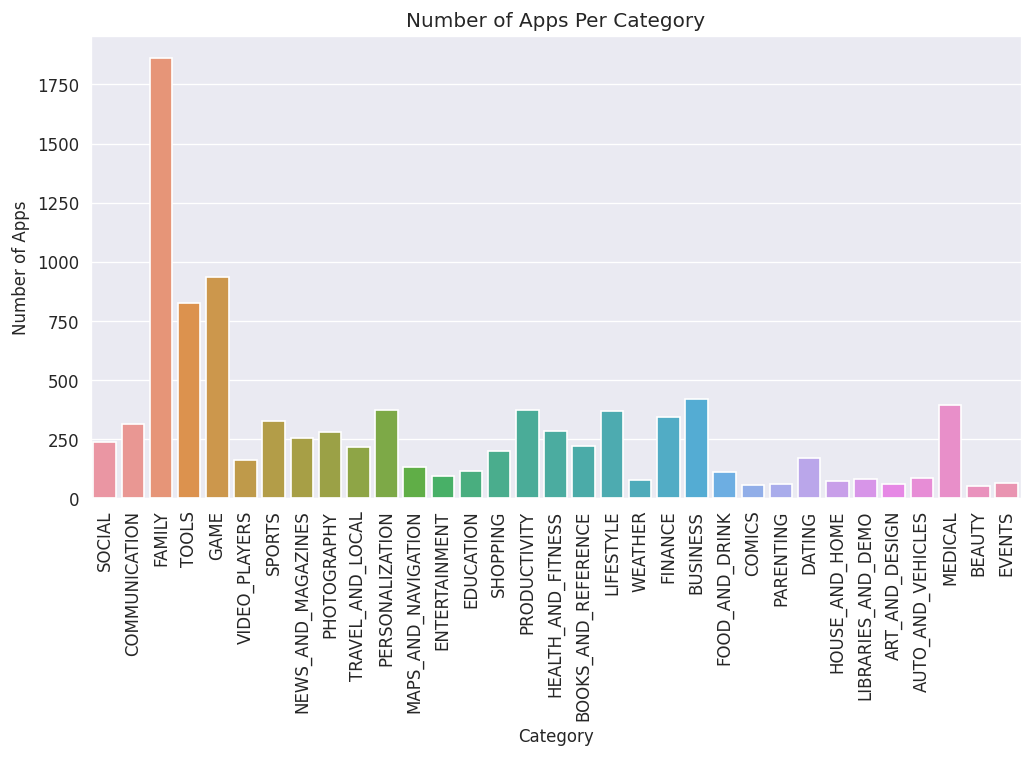

In [67]:
import seaborn as sns
# số lượng app qua danh mục
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=df_CHPLAY)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

In [68]:
#Kết quả của việc trực quan hóa ở trên có thể được biểu diễn một cách tốt hơn trong một bảng.
cat_table = df_CHPLAY.groupby('Category').size()
cat_table = cat_table.reset_index(name='Count').nlargest(10,'Count')
cat_table

,Category,Count
11,FAMILY,1860
14,GAME,936
29,TOOLS,825
4,BUSINESS,419
20,MEDICAL,396
23,PERSONALIZATION,374
25,PRODUCTIVITY,374
18,LIFESTYLE,369
12,FINANCE,345
28,SPORTS,327


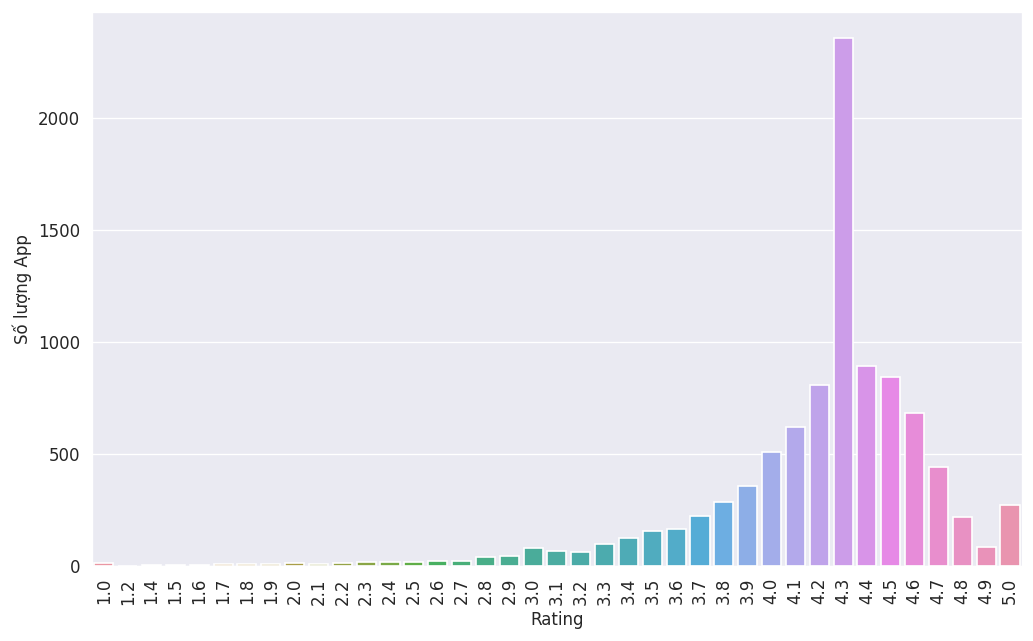

In [113]:
#Phân phối đánh giá cho tập dữ liệu
sns.countplot(x='Rating', data=df_CHPLAY)
plt.xticks(rotation=90)
plt.ylabel('Số lượng App')
plt.show()

Tập trung từ 3.9 tới 4.8

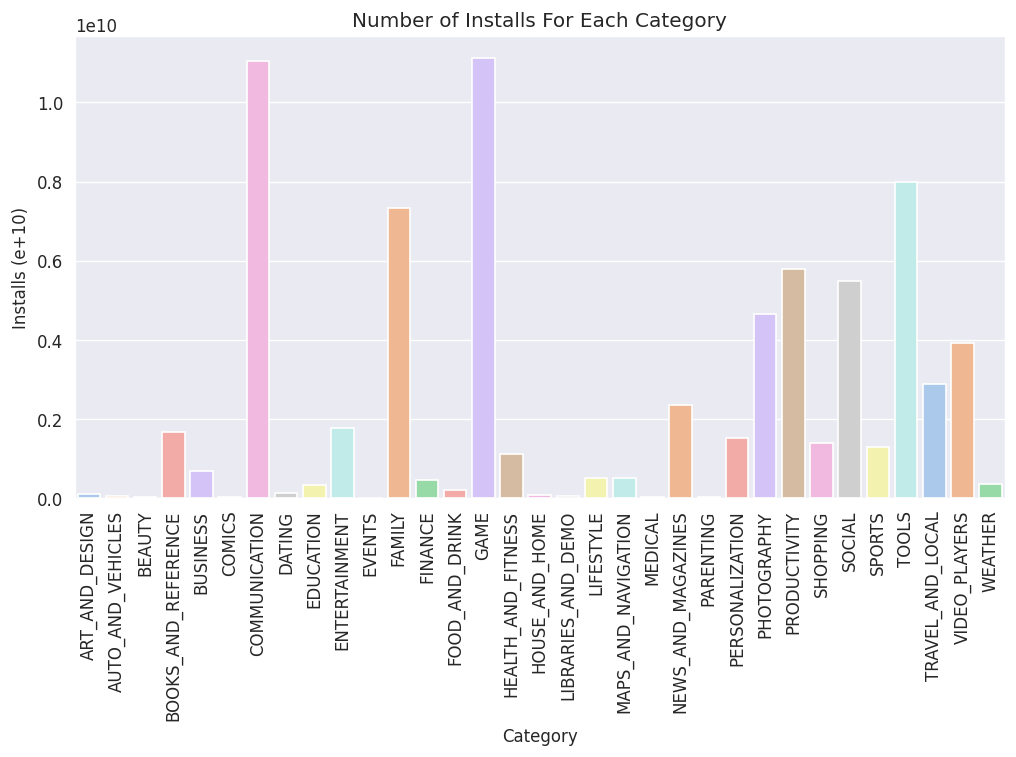

In [116]:
categories = df_CHPLAY.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum()
category_installs_sum_df = category_installs_sum_df.reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df , palette=sns.color_palette('pastel'))
plt.xticks(rotation=90)
plt.ylabel('Installs (e+10)')
plt.title('Number of Installs For Each Category')
plt.show()

Mặc dù là Category có số lượng App chỉ đứng thứ 2. Nhưng Game được cài đặt nhiều nhất. Tiếp theo là Nhu cầu Kết nối (Mạng xã hội) - Tools và Family lần lượt thứ 3 và 4*

<ipython-input-117-ffbbdb068de3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rating_df_CHPLAY = df_CHPLAY.groupby('Rating').sum().reset_index()


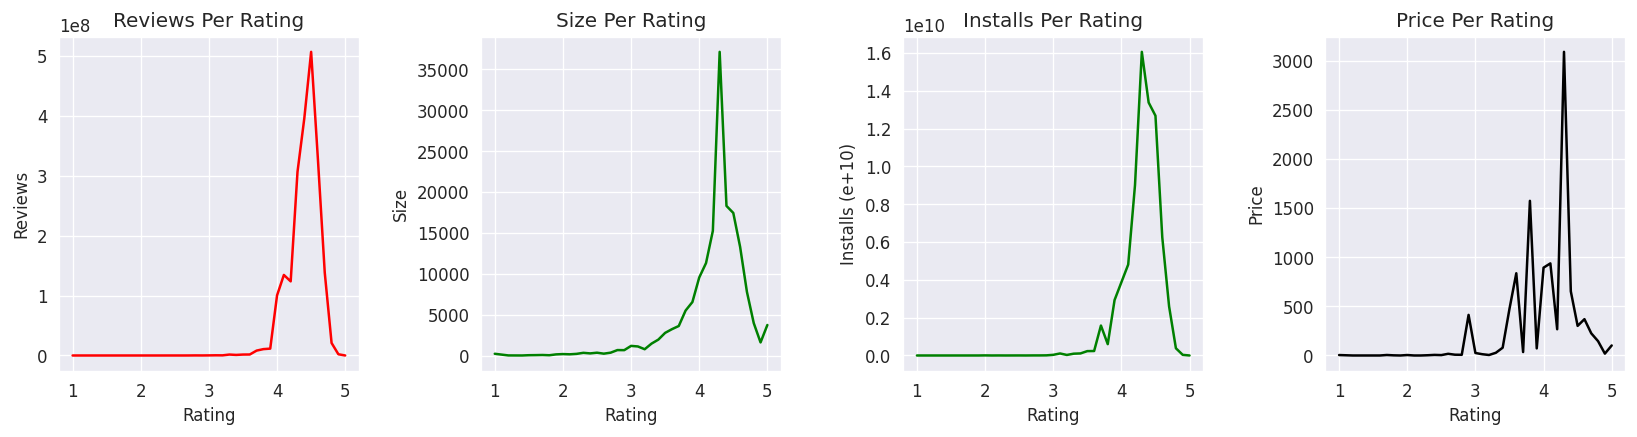

In [117]:
# Vẽ các đồ thị cho số lượng đánh giá (reviews), kích thước ứng dụng (size), số lần tải (installs) và giá của ứng dụng (price) theo từng mức đánh giá (rating).
rating_df_CHPLAY = df_CHPLAY.groupby('Rating').sum().reset_index()

fig, axes = plt.subplots(1, 4, figsize=(14, 4))

axes[0].plot(rating_df_CHPLAY['Rating'], rating_df_CHPLAY['Reviews'], 'r')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Reviews Per Rating')

axes[1].plot(rating_df_CHPLAY['Rating'], rating_df_CHPLAY['Size'], 'g')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size Per Rating')

axes[2].plot(rating_df_CHPLAY['Rating'], rating_df_CHPLAY['Installs'], 'g')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Installs (e+10)')
axes[2].set_title('Installs Per Rating')

axes[3].plot(rating_df_CHPLAY['Rating'], rating_df_CHPLAY['Price'], 'k')
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price Per Rating')

plt.tight_layout(pad=2)
plt.show()

Từ các biểu đồ trên, ta có thể rút ra rằng hầu hết các ứng dụng có mức đánh giá cao trong khoảng từ 4.0 đến 4.7 thường có số lượng đánh giá, kích thước và số lượt tải cao. Tuy nhiên, về mặt giá cả, không có một mối quan hệ trực tiếp với mức đánh giá, bởi vì ta có thể thấy sự biến đổi về giá cả ngay cả ở các mức đánh giá cao.

# SỐ APPS FREE / TRẢ PHÍ

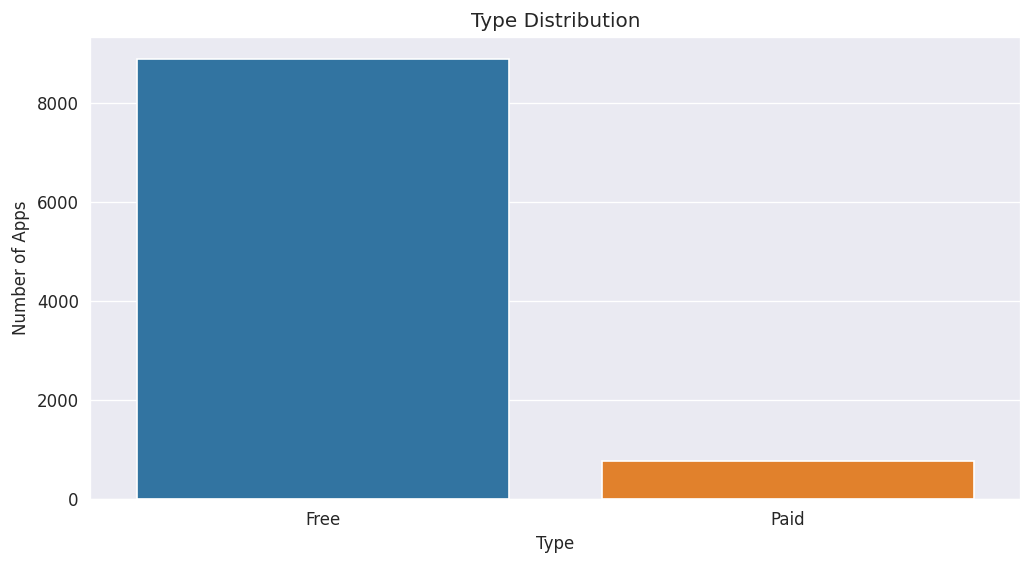

In [119]:
# application type distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Type', data=df_CHPLAY)
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()

Từ biểu đồ, chúng ta có thể suy ra rằng đa số các ứng dụng trên Google Play Store là ứng dụng miễn phí (Free apps).

<Axes: xlabel='Size', ylabel='Rating'>

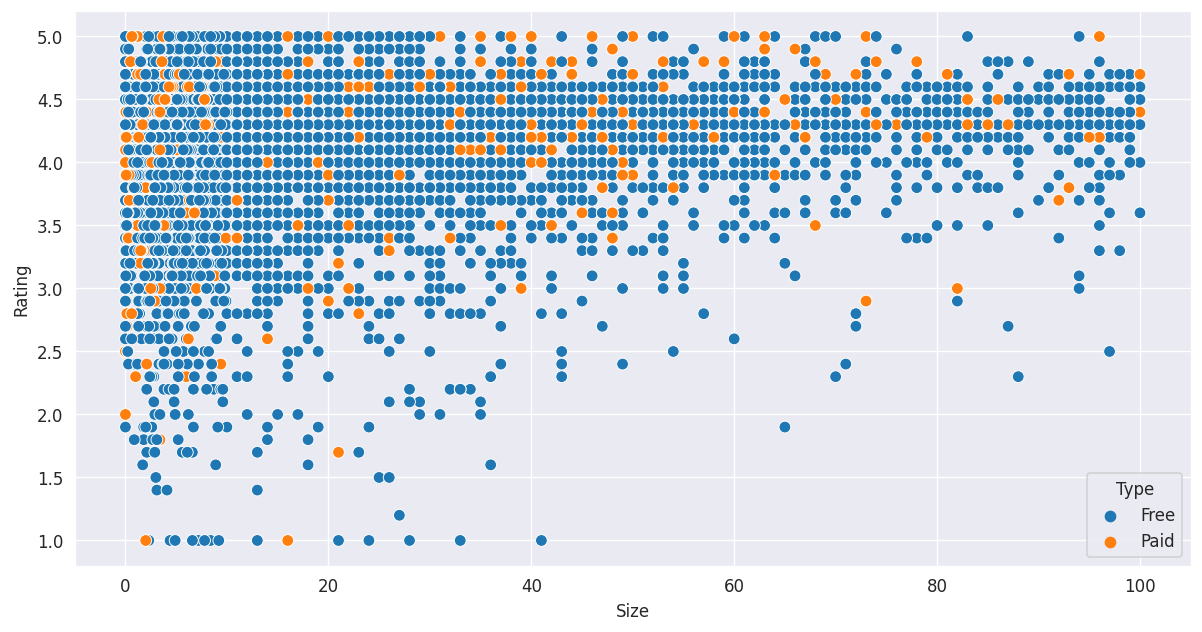

In [120]:
# show the distribution of apps in term of their rating, size and type
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Size',y='Rating',hue='Type',s=50, data=df_CHPLAY)

Từ biểu đồ scatter plot này, chúng ta có thể kết luận rằng đa số các ứng dụng miễn phí có kích thước nhỏ và được đánh giá cao. Trong khi đó, đối với các ứng dụng trả phí, chúng ta thấy có sự đồng đều về phân bố kích thước và mức đánh giá.
CHỌN CÁCH BIẾN PHÂN LOẠI: Category, Type, Content Rating

# DECISION TREE CLASSIFIER

In [121]:
#Chọn các cột có tính Phân Loại
feature_selected_df = df_CHPLAY
feature_selected_df.drop(['App','Reviews','Size','Installs','Price','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)
feature_selected_df

,Category,Rating,Type,Content Rating
4533,SOCIAL,4.1,Free,Teen
9660,COMMUNICATION,4.4,Free,Everyone
5729,SOCIAL,4.5,Free,Teen
6545,COMMUNICATION,4.0,Free,Everyone
2699,FAMILY,4.6,Free,Everyone 10+
...,...,...,...,...
9551,PERSONALIZATION,4.3,Free,Teen
9552,PERSONALIZATION,4.3,Free,Teen
1871,GAME,4.3,Free,Everyone
9557,PERSONALIZATION,4.3,Free,Teen


In [125]:
from sklearn.preprocessing import LabelEncoder

# Danh sách các cột cần mã hóa
cols_to_encode = ['Category', 'Type','Content Rating']

# Tạo một DataFrame mới với các cột được mã hóa
df_CHPLAY_encoded = df_CHPLAY.copy() # Sao chép DataFrame gốc
for col in cols_to_encode:
    df_CHPLAY_encoded[col] = LabelEncoder().fit_transform(df_CHPLAY_encoded[col])

# Hiển thị DataFrame mới đã được mã hóa
print(df_CHPLAY_encoded)

      Category  Rating  Type  Content Rating
4533        27     4.1     0               4
9660         6     4.4     0               1
5729        27     4.5     0               4
6545         6     4.0     0               1
2699        11     4.6     0               2
...        ...     ...   ...             ...
9551        23     4.3     0               4
9552        23     4.3     0               4
1871        14     4.3     0               1
9557        23     4.3     0               4
1259        29     4.3     0               1

[9648 rows x 4 columns]


In [126]:
# Chia khoảng giá trị và gán nhãn cho cột Rating
bins = [-0.1, 0.9, 1.9, 2.9, 3.9, 4.9, 5.0]
labels = [0, 1, 2, 3, 4, 5]
df_CHPLAY_encoded['Rating'] = pd.cut(df_CHPLAY_encoded['Rating'], bins=bins, labels=labels, include_lowest=True)

# Hiển thị kết quả
print(df_CHPLAY_encoded)

      Category Rating  Type  Content Rating
4533        27      4     0               4
9660         6      4     0               1
5729        27      4     0               4
6545         6      4     0               1
2699        11      4     0               2
...        ...    ...   ...             ...
9551        23      4     0               4
9552        23      4     0               4
1871        14      4     0               1
9557        23      4     0               4
1259        29      4     0               1

[9648 rows x 4 columns]


In [127]:
from sklearn.model_selection import train_test_split
y = df_CHPLAY_encoded["Rating"].values
X = df_CHPLAY_encoded[['Category', 'Type','Content Rating']].values #Không dùng cột id và cột cuối cho x
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [128]:
from sklearn import tree #Gọi mô hình và training đơn giản như các thuật toán đã học ở bài trước
model_tree2 = tree.DecisionTreeClassifier()
model_tree2.fit(X_train, y_train) #Training mô hình

DecisionTreeClassifier()

In [129]:
#Đánh giá độ chính xác của mô hình
model_tree2.score(X_test,y_test)

0.7772020725388601

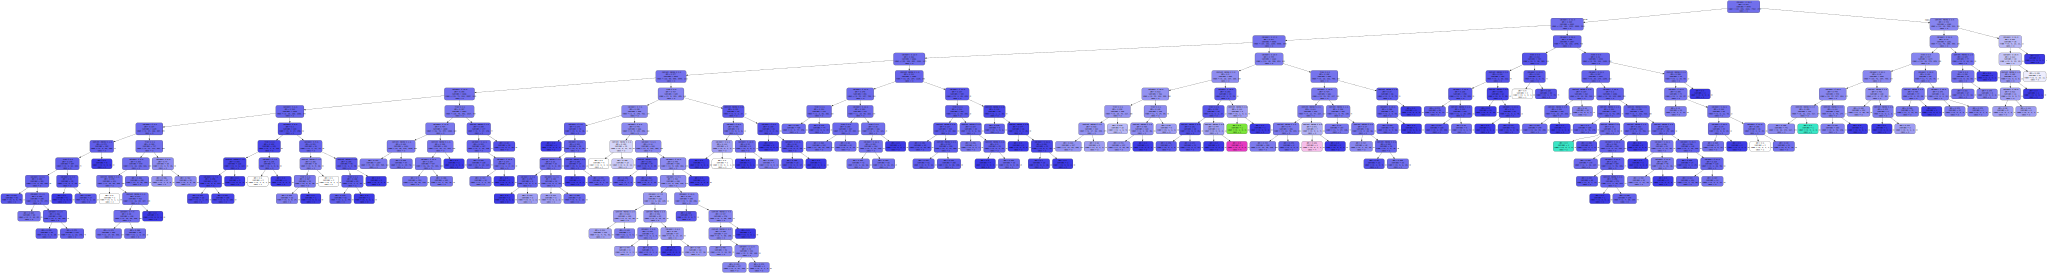

In [130]:
# Chúng ta có thể vẽ lại cây quyết định như sau
from sklearn import tree
model_tree2 = tree.DecisionTreeClassifier()
model_tree2 = model_tree2.fit(X, y)#Tính toán/fit model
import graphviz #Thư viện để hiển thị
dot_data = tree.export_graphviz(model_tree2, out_file=None,feature_names=['Category', 'Type','Content Rating'],class_names=["0","1","2","3","4","5"],filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph